Preparação de um Qubit em Superposição:

Conceito: Superposição quântica.

Descrição:

Inicializar um qubit no estado fundamental ($|0\rangle$).

Aplicar uma porta Hadamard (qml.H) para colocá-lo em uma superposição de $|0\rangle$ e $|1\rangle$.

Medir o qubit várias vezes para observar as probabilidades de resultado.

In [2]:
try:
    import pennylane as qml
    from pennylane import numpy as np
    print("PennyLane já está instalado.")
except ImportError:
    print("PennyLane não está instalado. Iniciando a instalação...")
    !pip install pennylane
    from pennylane import numpy as np
    import pennylane as qml
    print("PennyLane instalado com sucesso.")

# Importando a biblioteca pennylane, o numpy e o matlotlib
import matplotlib.pyplot as plt


PennyLane não está instalado. Iniciando a instalação...
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 57.1/57.1 kB 2.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 5.3/5.3 MB 47.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 934.3/934.3 kB 44.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.5/2.5 MB 62.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.2/2.2 MB 55.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 167.9/167.9 kB 12.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 8.6/8.6 MB 87.6 MB/s eta 0:00:00
PennyLane instalado com sucesso.


/usr/local/lib/python3.12/dist-packages/pennylane/__init__.py:209: RuntimeWarning: PennyLane is not yet compatible with JAX versions > 0.6.2. You have version 0.7.2 installed. Please downgrade JAX to 0.6.2 to avoid runtime errors using python -m pip install jax~=0.6.0 jaxlib~=0.6.0
  warnings.warn(


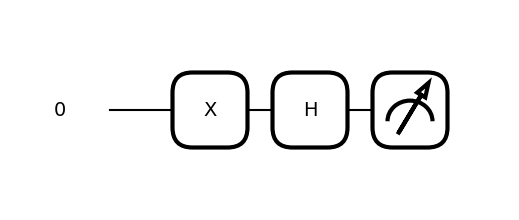

In [3]:

# Cria um dispositivo com 1 qubit e 100 repetições (shots) para estatística.
dev_superposition = qml.device("default.qubit", wires=1)

@qml.qnode(dev_superposition, shots=100)
def superposition_circuit():
    # Aplica a porta Hadamard no qubit 0.
    qml.X(wires=0)
    qml.Hadamard(wires=0)
    # Mede no eixo Z. No default.qubit, +1 para |0> e -1 para |1>
    return qml.sample(qml.PauliZ(0))

qml.draw_mpl(superposition_circuit)()

# Executa o circuito
superposition_results = superposition_circuit()

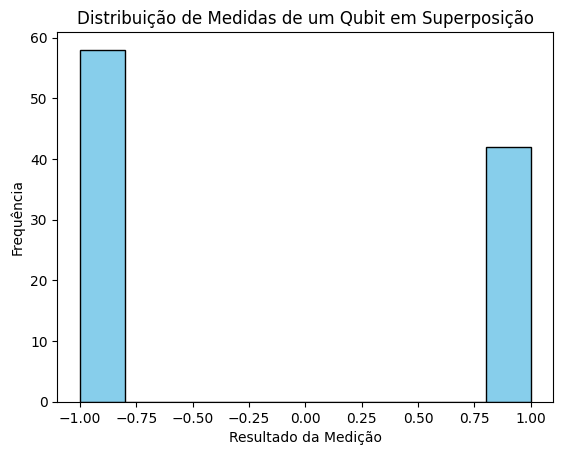

In [4]:

plt.hist(superposition_results, bins=10, color='skyblue', edgecolor='black')
plt.title('Distribuição de Medidas de um Qubit em Superposição')
plt.xlabel('Resultado da Medição')
plt.ylabel('Frequência')
plt.show()


N_shots =  100
superposition_results= [ 1. -1. -1. -1.  1. -1.  1.  1. -1. -1.  1. -1.  1. -1.  1.  1. -1. -1.
  1. -1. -1. -1.  1.  1. -1. -1. -1.  1. -1.  1.  1. -1. -1. -1. -1.  1.
 -1. -1. -1. -1.  1.  1. -1.  1. -1.  1. -1. -1. -1.  1. -1.  1.  1.  1.
  1. -1.  1.  1. -1. -1. -1. -1. -1.  1. -1. -1. -1. -1.  1.  1.  1. -1.
 -1.  1.  1.  1. -1. -1.  1.  1. -1. -1. -1. -1. -1. -1.  1. -1.  1.  1.
  1. -1. -1.  1. -1. -1.  1. -1.  1. -1.]


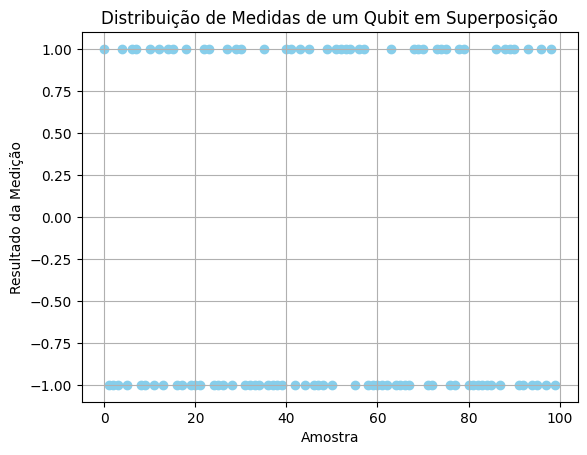

In [5]:
print('N_shots = ', len(superposition_results) )

print('superposition_results=', superposition_results)

plt.scatter(range(len(superposition_results)), superposition_results, color='skyblue')
plt.title('Distribuição de Medidas de um Qubit em Superposição')
plt.xlabel('Amostra')
plt.ylabel('Resultado da Medição')
plt.grid(True)
plt.show()


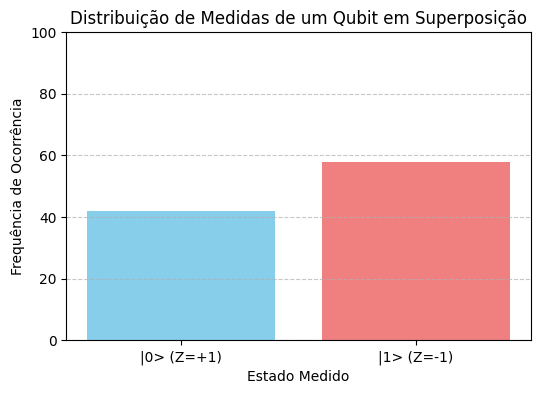

Resultados da superposição: Counter({np.float64(-1.0): 58, np.float64(1.0): 42})
Probabilidade de |0>: 0.42
Probabilidade de |1>: 0.58
<Z>: -0.16


In [6]:

from collections import Counter

# Contagem dos resultados
# |0> é mapeado para +1 no PauliZ, |1> para -1
counts = Counter(superposition_results)

# Mapeia para labels mais intuitivas (0 e 1)
labels = ['|0> (Z=+1)', '|1> (Z=-1)']
values = [counts.get(1, 0), counts.get(-1, 0)] # Garante que haja 0 se não houver resultado

# Criação do gráfico de barras
plt.figure(figsize=(6, 4))
plt.bar(labels, values, color=['skyblue', 'lightcoral'])
plt.title('Distribuição de Medidas de um Qubit em Superposição')
plt.xlabel('Estado Medido')
plt.ylabel('Frequência de Ocorrência')
plt.ylim(0, len(superposition_results))  # Define o limite Y pela quantidade de shots
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()

print(f"Resultados da superposição: {counts}")
print(f"Probabilidade de |0>: {values[0] / sum(values):.2f}")
print(f"Probabilidade de |1>: {values[1] / sum(values):.2f}")
print(f"<Z>: { (values[0]-values[1]) / sum(values):.2f}")


Exercício. Realizar os contas análiticos da atuação da porta Hadamard,

$
H = \frac{1}{\sqrt{2}}
\begin{bmatrix}
1 & 1 \\
1 & -1
\end{bmatrix}
$
nos estados ,

a) $|\psi_0 \rangle =  |0\rangle$ e $|\psi_1 \rangle =  |1\rangle$ obtendo o estado final  $|\psi_{final} \rangle$ para cada estado inicial.

b)  Calcule o valor esperado de $\langle\psi_{final}|Z|\psi_{final} \rangle$ para cada estado final do item anterior.

$
Z =
\begin{bmatrix}
1 & 0 \\
0 & -1
\end{bmatrix}
$

C) Desafio: Modifique o código acima para que o estado inicial seja o estado $|1\rangle$ e compare o resultado.